# I. Introduction
Name: Daffa Ilham Altaffitri
Batch: RMT-27
## Problem Statements, Objectives, and Goals
Hello, my name is Daffa, and I have recently joined SegerWaras.co, a leading health-tech company, as a Data Scientist. My inaugural project involves analyzing text data provided by our team of psychologists and psychiatrists. This dataset comprises chat messages from our customers, which contain rich insights into their emotional states and mental health concerns.

The primary objective of this project is to develop an NLP (Natural Language Processing) analysis system capable of classifying these chat messages into categories such as sadness, joy, love, etc. This classification will enable our mental health professionals to better understand the prevailing emotional states of our users, thereby assisting in diagnosis, treatment planning, and tailoring their interactions to meet the users' specific needs more effectively.

To achieve this goal, I plan to undertake the following steps:

Data Preprocessing: Clean and prepare the chat messages for analysis, ensuring the text data is standardized and suitable for machine learning models.

Exploratory Data Analysis (EDA): Conduct a thorough examination of the dataset to uncover underlying patterns, the distribution of emotional states, and other insights that could inform our modeling approach.

Feature Engineering: Develop and refine features from the text data that can capture the nuances of language use and emotional expression, making them accessible to our models.

Model Selection and Training: Evaluate various NLP models for text classification, selecting the one that offers the best balance of accuracy and interpretability for our needs. Train this model on our dataset, optimizing its performance to accurately classify the emotional content of chat messages.

Evaluation and Iteration: Assess the model's effectiveness using a hold-out test set and real-world validation, making iterative improvements based on feedback from our mental health professionals and performance metrics.

Deployment and Monitoring: Implement the trained model into our existing infrastructure, ensuring it can classify incoming chat messages in real-time. Establish a monitoring system to track the model's performance and adapt to changes in user communication patterns over time.

By successfully completing this project, I aim to provide SegerWaras.co's psychologists and psychiatrists with a powerful tool that enhances their understanding of our customers' mental health needs and improves the quality of care we offer. This initiative is a step forward in leveraging advanced technology to support mental health and well-being in our community.

# II. Import Libraries

In [53]:
# Basic
import pandas as pd
import numpy as np
from collections import Counter
import nltk
from scipy.stats import kruskal
# Viz
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Analyze tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
import keras_tuner
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.utils.class_weight import compute_class_weight
nltk.download('wordnet')
import re
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
print('imported :)')

imported :)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# III. Import Dataset

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"daffailhamaltafitri","key":"1f1c1fa5ddf8f8e112361f9b4d4aedb0"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

100% 721k/721k [00:00<00:00, 1.57MB/s]
100% 721k/721k [00:00<00:00, 1.57MB/s]


In [7]:
!unzip emotions-dataset-for-nlp.zip

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [8]:
# saving dataset
df = pd.read_csv("train.txt",
                 delimiter=';', header=None, names=['sentence','label'])
val_df = pd.read_csv("val.txt",
                 delimiter=';', header=None, names=['sentence','label'])
test_df = pd.read_csv("test.txt",
                 delimiter=';', header=None, names=['sentence','label'])

In [9]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2000 non-null   object
 1   label     2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [10]:
# Show top 5 of the dataset
print(df.head())
print(val_df.head())
print(test_df.head())

                                            sentence    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
                                            sentence    label
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy
                                            sentence    label
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i lef

# IV. EDA

## Descriptive Analysis

In [11]:
# Descriptive Statistics: Label Distribution
label_distribution = df['label'].value_counts(normalize=True)
label_distribution

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: label, dtype: float64

(joy         0.335125
 sadness     0.291625
 anger       0.134937
 fear        0.121063
 love        0.081500
 surprise    0.035750
 Name: label, dtype: float64,
 count    16000.000000
 mean        96.845812
 std         55.904953
 min          7.000000
 25%         53.000000
 50%         86.000000
 75%        129.000000
 max        300.000000
 Name: sentence_length, dtype: float64)

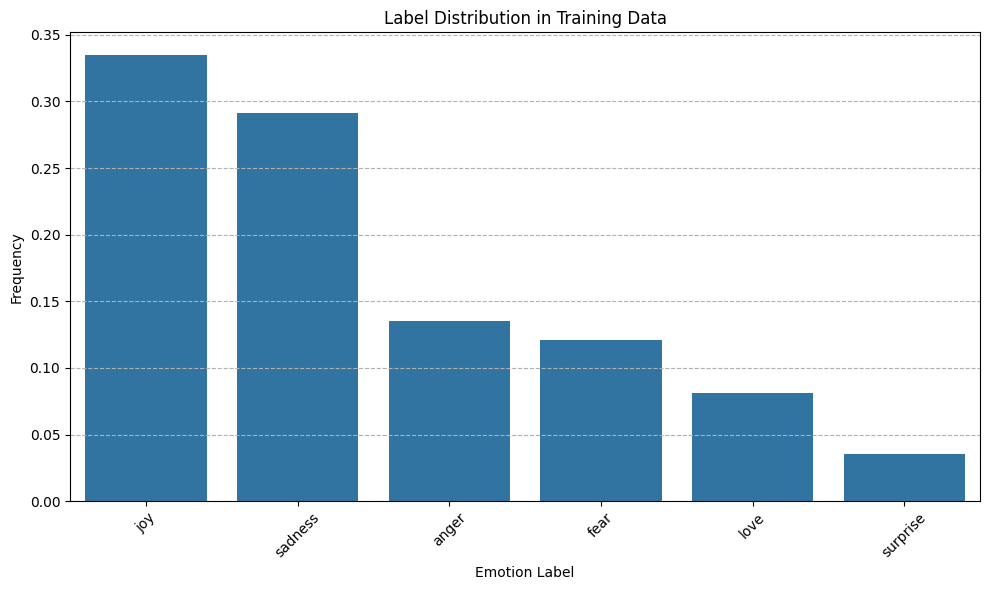

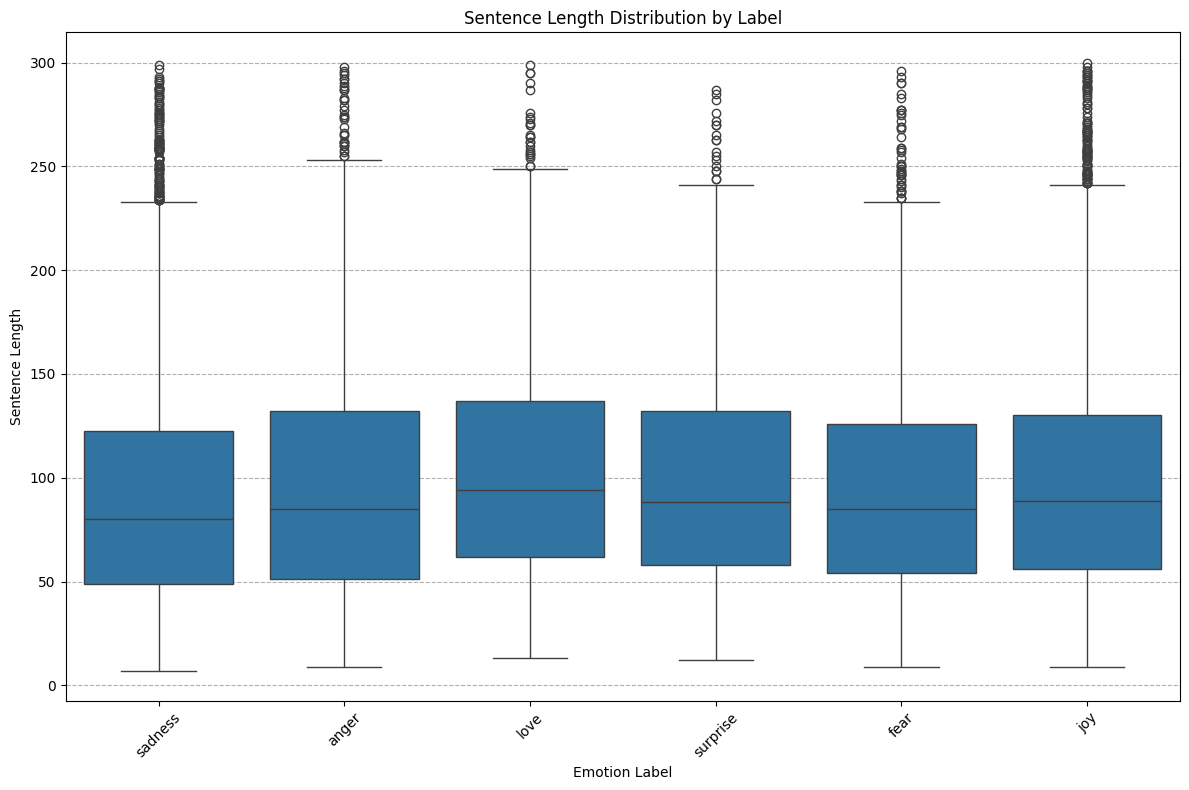

In [12]:
# EDA: Sentence Length Distribution
df['sentence_length'] = df['sentence'].apply(len)
sentence_length_stats = df['sentence_length'].describe()

# Plotting Label Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values)
plt.title('Label Distribution in Training Data')
plt.xlabel('Emotion Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Plotting Sentence Length Distribution by Label
plt.figure(figsize=(12, 8))
sns.boxplot(x='label', y='sentence_length', data=df)
plt.title('Sentence Length Distribution by Label')
plt.xlabel('Emotion Label')
plt.ylabel('Sentence Length')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

label_distribution, sentence_length_stats

### Insights:
- Label Distribution:
The label distribution in the training data shows the following

- proportions of emotional states:

 - Joy is the most common label, comprising approximately 33.5% of the dataset.
 - Sadness follows with about 29.2%.
 - The other labels are distributed as Anger (13.5%), Fear (12.1%), Love (8.15%), and Surprise (3.58%).

Sentence Length Distribution
The average sentence length across all messages is about 97 characters.
There's a wide range of sentence lengths, with a minimum of 7 characters and a maximum of 300 characters.
The distribution has a standard deviation of approximately 56 characters, indicating variability in sentence length.

- Visual Analysis:
 The Label Distribution plot visually confirms the numerical proportions, highlighting the imbalance in the dataset, with "joy" and "sadness" being more prevalent.
 The Sentence Length Distribution by Label plot reveals variability in sentence lengths across different labels. Some emotional states might lead to longer or shorter sentences, but the overall distributions overlap considerably, suggesting that sentence length alone may not be a strong discriminative feature for emotional state classification.

 -Insights and Next Steps
The imbalance in label distribution could influence model performance, potentially biasing it towards more frequent labels. Techniques like oversampling, undersampling, or weighted loss functions might be
necessary to address this.

## Inferential Analysis
Given the nature of data and project goals, let's start with a simple inferential analysis by comparing the sentence lengths across categories to see if there are significant differences. This will involve performing a Kruskal-Wallis test, a non-parametric method suitable for data that may not follow a normal distribution.

In [13]:
# Preparing data for Kruskal-Wallis Test
data_groups = [df['sentence_length'] for label, df in df.groupby('label')]

# Perform the Kruskal-Wallis Test
stat, p_value = kruskal(*data_groups)

stat, p_value

(86.44492026035054, 3.746578918460943e-17)

Inferential Analysis: Kruskal-Wallis Test Result
The Kruskal-Wallis test, a non-parametric method for testing whether samples originate from the same distribution, was conducted on the sentence lengths across different emotional states. The results are as follows:

Statistic: 86.44

Given the extremely low p-value, we reject the null hypothesis that the median sentence lengths are the same across all emotional states. This suggests that there are statistically significant differences in the distribution of sentence lengths among the various categories of emotional states in the dataset.

This result indicates that the length of a sentence could be associated with the emotional state it expresses. This insight can be valuable for feature engineering and model development, suggesting that including sentence length as a feature could improve the model's ability to classify emotional states.

### Examine diffrences in sentence lenght by category

In [14]:
median_sentence_length_by_category = df.groupby('label')['sentence_length'].median().sort_values()

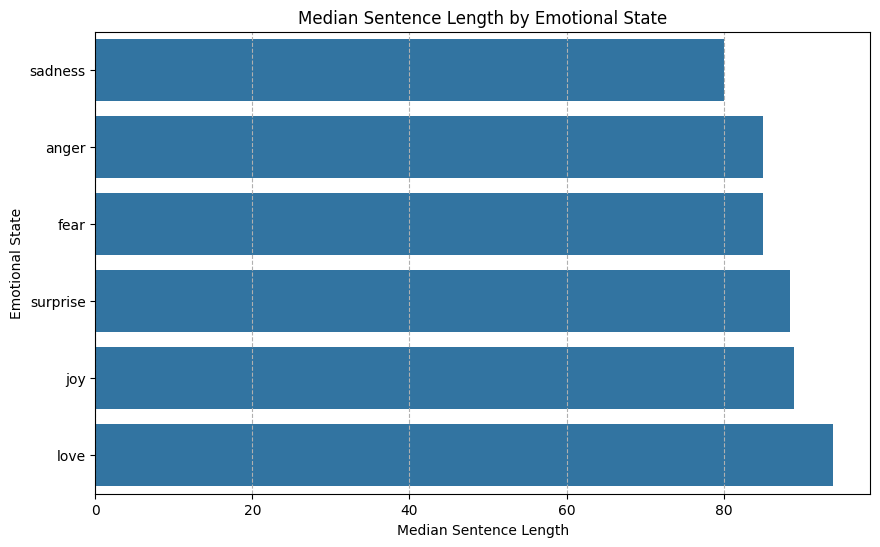

In [15]:
# Plotting Median Sentence Length by Category
plt.figure(figsize=(10, 6))
sns.barplot(x=median_sentence_length_by_category.values, y=median_sentence_length_by_category.index)
plt.title('Median Sentence Length by Emotional State')
plt.xlabel('Median Sentence Length')
plt.ylabel('Emotional State')
plt.grid(axis='x', linestyle='--')
plt.show()

The visualization of median sentence lengths by emotional state reveals the following insights:

 - Sadness has the shortest median sentence length at 80 characters.
 - Anger and Fear share a similar median length of 85 characters.
 - Surprise sees a slight increase with a median of 88.5 characters.
 - Joy's median sentence length is 89 characters, indicating that messages expressing joy are slightly longer.
 - Love stands out with the longest median sentence length at 94 characters, suggesting that expressions of love tend to be more verbose.

In [16]:
# Download NLTK stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_tokenize(sentence):
    # Convert to lowercase and tokenize
    words = word_tokenize(sentence.lower())
    # Remove stopwords and non-alphabetic words
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return filtered_words

# Apply text cleaning and tokenization
df['tokens'] = df['sentence'].apply(clean_tokenize)

# Calculate word frequencies by category
word_frequencies_by_category = {}

for category in df['label'].unique():
    category_words = df[df['label'] == category]['tokens'].explode()
    word_frequencies = category_words.value_counts().head(10) # Top 10 words
    word_frequencies_by_category[category] = word_frequencies

word_frequencies_by_category['joy']  # Example output for 'joy' category

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


feel       3928
feeling    1539
like       1006
im          799
really      309
time        290
get         249
know        240
make        225
would       205
Name: tokens, dtype: int64

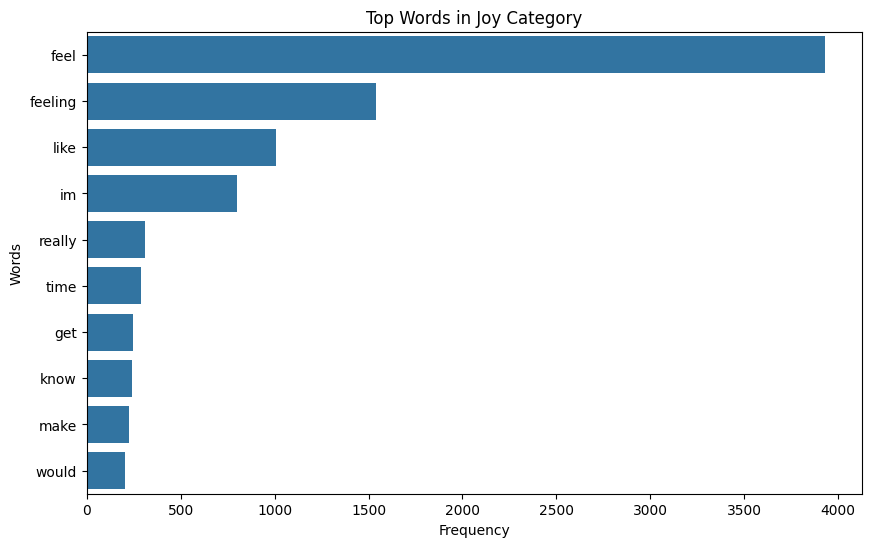

In [17]:
# Apply text cleaning and tokenization
df['tokens'] = df['sentence'].apply(clean_tokenize)

# Calculate word frequencies by category
word_frequencies_by_category = {}

for category in df['label'].unique():
    category_words = df[df['label'] == category]['tokens'].explode()
    word_frequencies = category_words.value_counts().head(10) # Top 10 words
    word_frequencies_by_category[category] = word_frequencies

# Visualization function for word frequencies in a given category
def plot_word_frequencies_for_category(category):
    if category not in word_frequencies_by_category:
        print(f"Category '{category}' not found.")
        return
    frequencies = word_frequencies_by_category[category]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies.values, y=frequencies.index)
    plt.title(f'Top Words in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example: Visualizing word frequencies for the 'joy' category
plot_word_frequencies_for_category('joy')

The graph above displays the top words in the "joy" category, based on their frequency in the dataset. this viz can help me to be quick on grasphing the data. I will this in all category

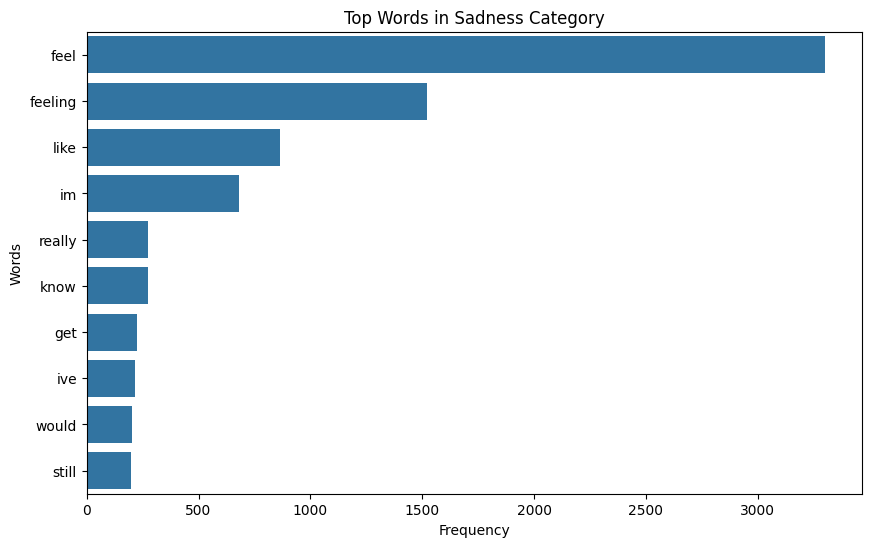

In [18]:
# Apply text cleaning and tokenization
df['tokens'] = df['sentence'].apply(clean_tokenize)

# Calculate word frequencies by category
word_frequencies_by_category = {}

for category in df['label'].unique():
    category_words = df[df['label'] == category]['tokens'].explode()
    word_frequencies = category_words.value_counts().head(10) # Top 10 words
    word_frequencies_by_category[category] = word_frequencies

# Visualization function for word frequencies in a given category
def plot_word_frequencies_for_category(category):
    if category not in word_frequencies_by_category:
        print(f"Category '{category}' not found.")
        return
    frequencies = word_frequencies_by_category[category]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies.values, y=frequencies.index)
    plt.title(f'Top Words in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example: Visualizing word frequencies for the 'sadness' category
plot_word_frequencies_for_category('sadness')

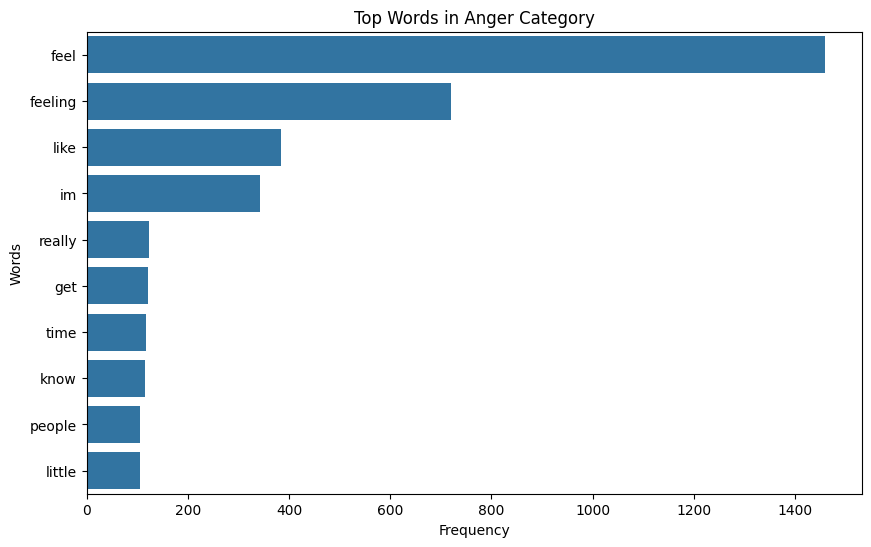

In [19]:
# Apply text cleaning and tokenization
df['tokens'] = df['sentence'].apply(clean_tokenize)

# Calculate word frequencies by category
word_frequencies_by_category = {}

for category in df['label'].unique():
    category_words = df[df['label'] == category]['tokens'].explode()
    word_frequencies = category_words.value_counts().head(10) # Top 10 words
    word_frequencies_by_category[category] = word_frequencies

# Visualization function for word frequencies in a given category
def plot_word_frequencies_for_category(category):
    if category not in word_frequencies_by_category:
        print(f"Category '{category}' not found.")
        return
    frequencies = word_frequencies_by_category[category]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies.values, y=frequencies.index)
    plt.title(f'Top Words in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example: Visualizing word frequencies for the 'anger' category
plot_word_frequencies_for_category('anger')

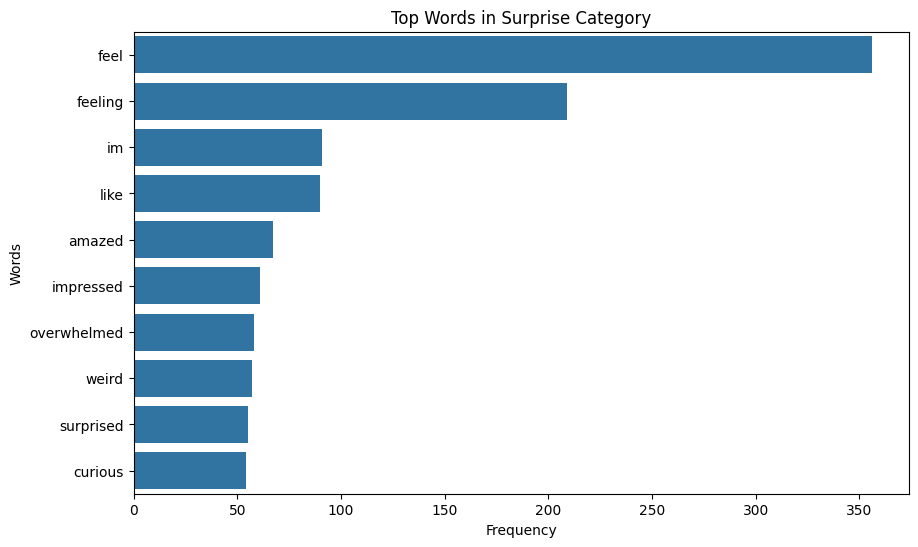

In [20]:
# Apply text cleaning and tokenization
df['tokens'] = df['sentence'].apply(clean_tokenize)

# Calculate word frequencies by category
word_frequencies_by_category = {}

for category in df['label'].unique():
    category_words = df[df['label'] == category]['tokens'].explode()
    word_frequencies = category_words.value_counts().head(10) # Top 10 words
    word_frequencies_by_category[category] = word_frequencies

# Visualization function for word frequencies in a given category
def plot_word_frequencies_for_category(category):
    if category not in word_frequencies_by_category:
        print(f"Category '{category}' not found.")
        return
    frequencies = word_frequencies_by_category[category]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies.values, y=frequencies.index)
    plt.title(f'Top Words in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example: Visualizing word frequencies for the 'surprise' category
plot_word_frequencies_for_category('surprise')

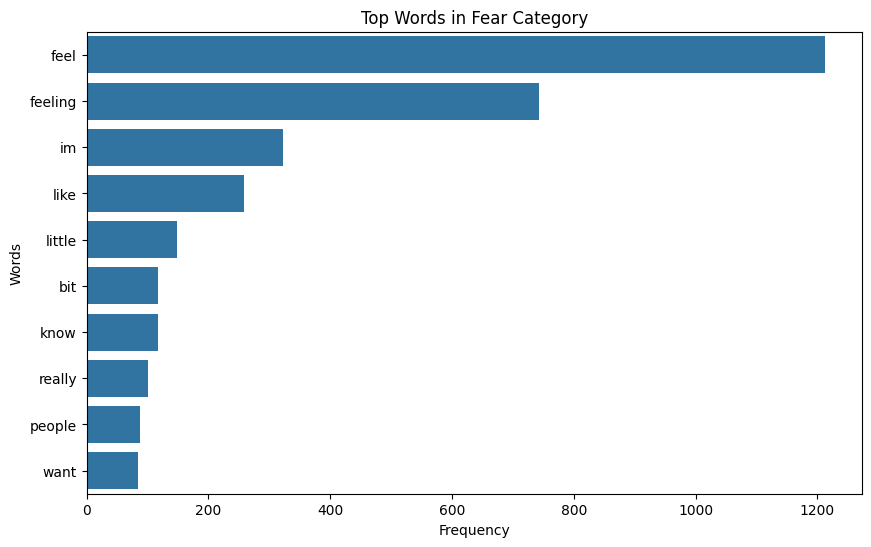

In [21]:
# Apply text cleaning and tokenization
df['tokens'] = df['sentence'].apply(clean_tokenize)

# Calculate word frequencies by category
word_frequencies_by_category = {}

for category in df['label'].unique():
    category_words = df[df['label'] == category]['tokens'].explode()
    word_frequencies = category_words.value_counts().head(10) # Top 10 words
    word_frequencies_by_category[category] = word_frequencies

# Visualization function for word frequencies in a given category
def plot_word_frequencies_for_category(category):
    if category not in word_frequencies_by_category:
        print(f"Category '{category}' not found.")
        return
    frequencies = word_frequencies_by_category[category]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies.values, y=frequencies.index)
    plt.title(f'Top Words in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example: Visualizing word frequencies for the 'fear' category
plot_word_frequencies_for_category('fear')

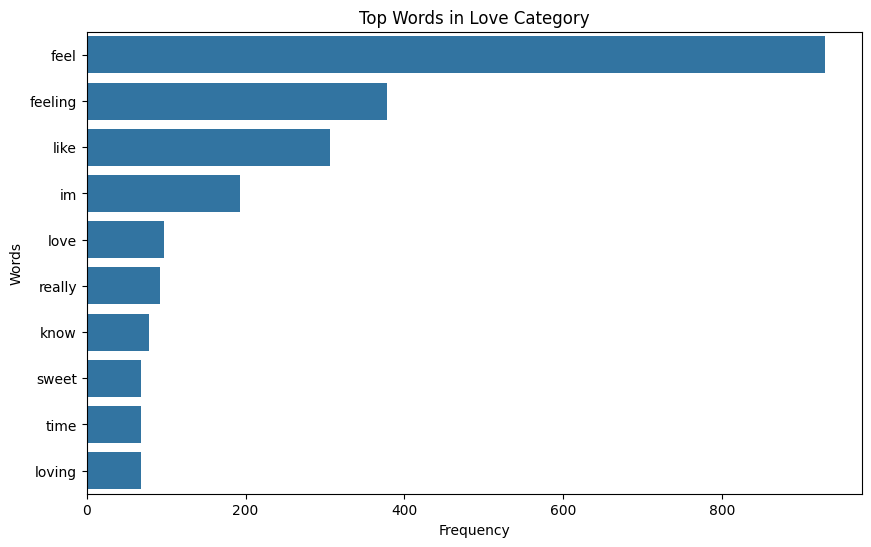

In [22]:
# Apply text cleaning and tokenization
df['tokens'] = df['sentence'].apply(clean_tokenize)

# Calculate word frequencies by category
word_frequencies_by_category = {}

for category in df['label'].unique():
    category_words = df[df['label'] == category]['tokens'].explode()
    word_frequencies = category_words.value_counts().head(10) # Top 10 words
    word_frequencies_by_category[category] = word_frequencies

# Visualization function for word frequencies in a given category
def plot_word_frequencies_for_category(category):
    if category not in word_frequencies_by_category:
        print(f"Category '{category}' not found.")
        return
    frequencies = word_frequencies_by_category[category]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies.values, y=frequencies.index)
    plt.title(f'Top Words in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example: Visualizing word frequencies for the 'love' category
plot_word_frequencies_for_category('love')

## Wordcloud

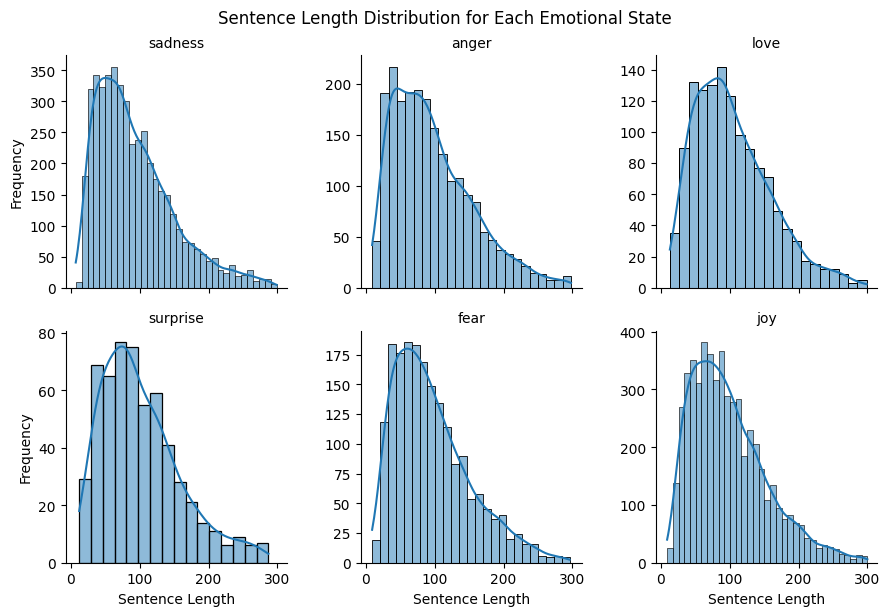

In [23]:
g = sns.FacetGrid(df, col='label', col_wrap=3, sharex=True, sharey=False)
g.map(sns.histplot, 'sentence_length', kde=True)

g.fig.suptitle('Sentence Length Distribution for Each Emotional State', y=1.02)
g.set_titles('{col_name}')
g.set_xlabels('Sentence Length')
g.set_ylabels('Frequency')
g.savefig('/content/sentence_lenght.png')
plt.show()

### Insights
- Technical Insights:
 Right-Skewed Distributions: All emotional states exhibit right-skewed distributions for sentence lengths, which is typical for text data. Most sentences are short to medium in length, with a tail of longer sentences.

 Mode of Sentence Lengths: Each emotional state seems to have a mode (the peak of the distribution) at relatively short sentence lengths, indicating a common sentence length that most users tend to use when expressing that emotion.

 Variability in Expression: Different emotions show different ranges and variances in sentence lengths. For instance, 'joy' appears to have the widest distribution, suggesting that joy is expressed with a variety of sentence lengths. In contrast, 'surprise' has a narrower distribution, indicating more consistency in sentence length when expressing surprise.

 Outliers and Long Sentences: The long tail in each distribution suggests the presence of outliers or sentences that are much longer than average. These might be instances where users provide more context or detail.

 Data Preprocessing for NLP: Knowing the distribution of sentence lengths can help in preprocessing decisions, such as setting a maximum sentence length for padding/truncation in tokenization processes for deep learning models.

- Business Insights:
 User Communication Patterns: Understanding how users express different emotions can inform how to tailor interactions with them. For example, customer service bots or mental health assessments can adjust their responses based on the typical sentence length associated with certain emotions.

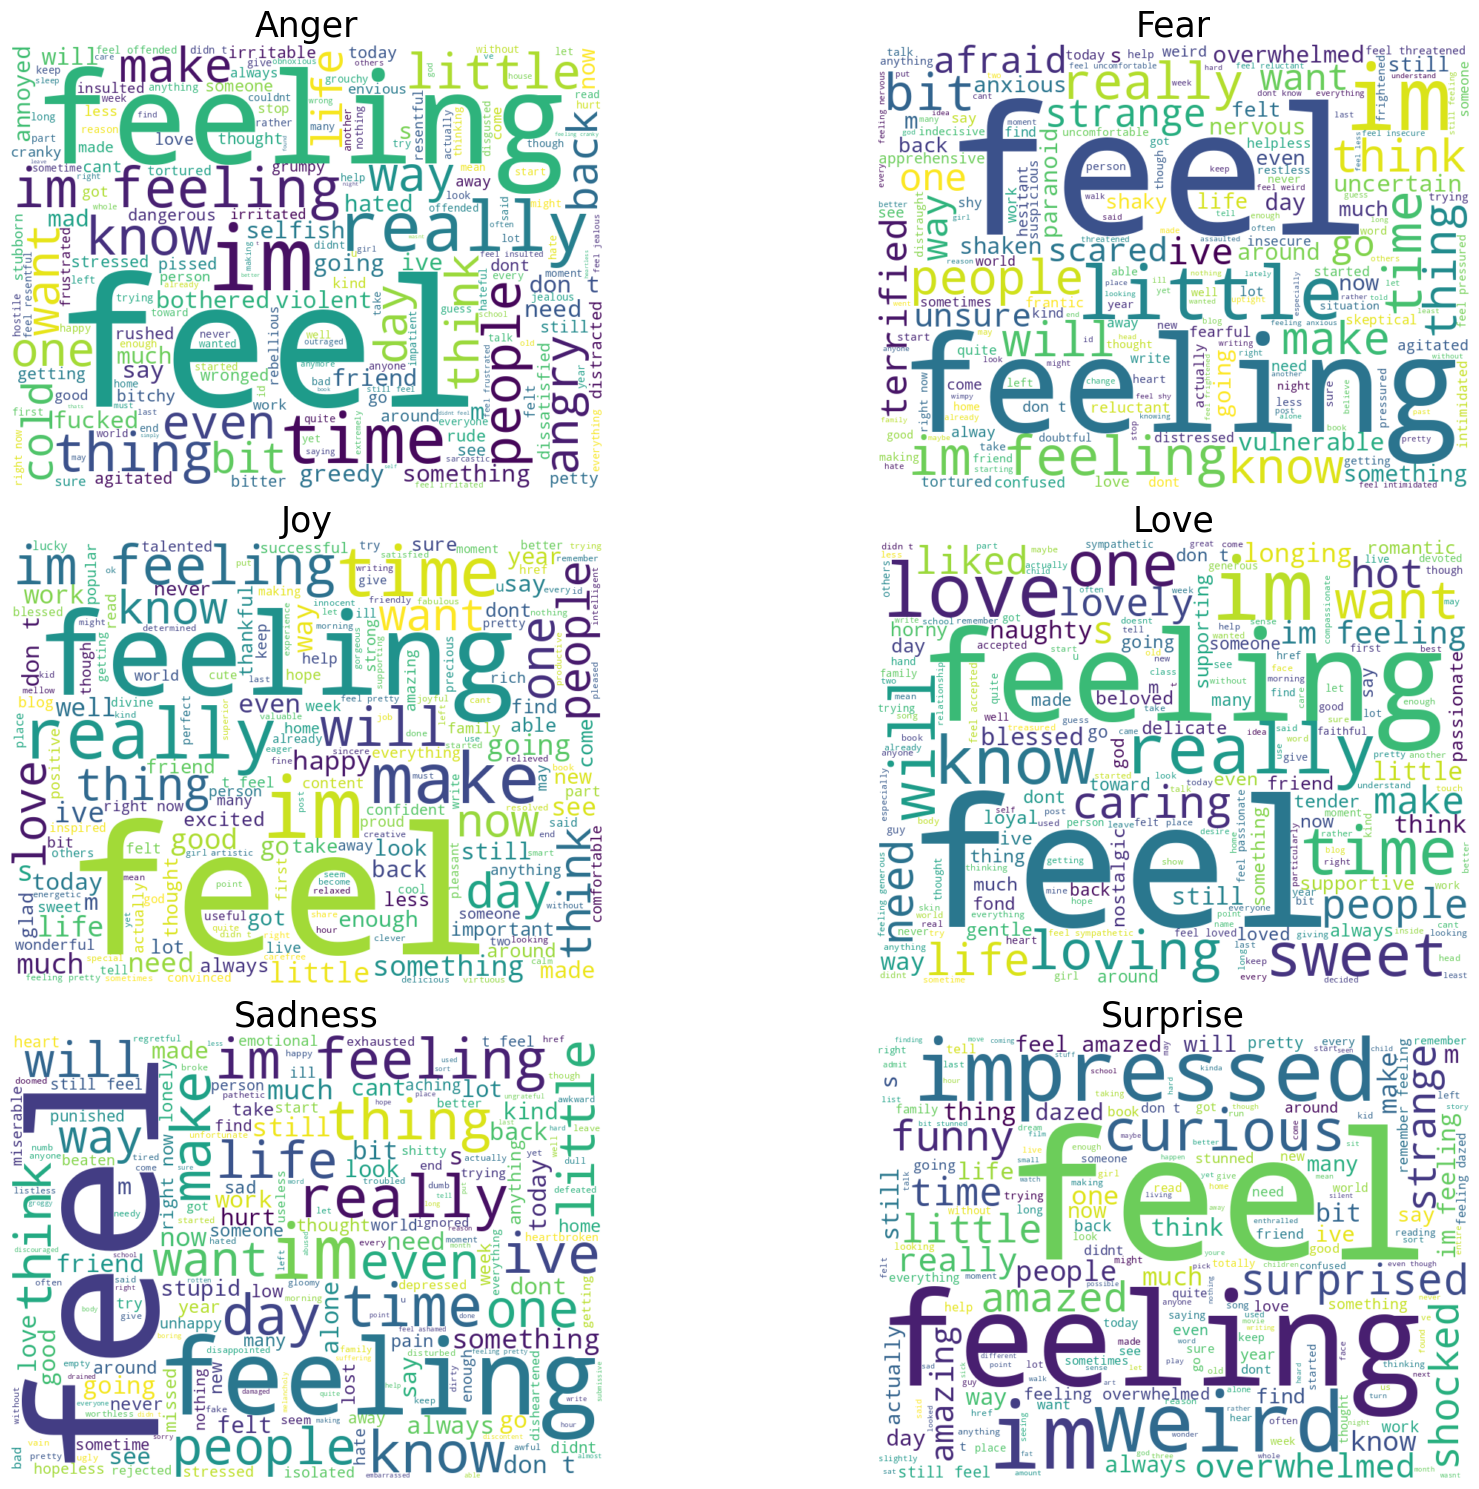

In [24]:
# Prepare the text for each emotional state
text_by_emotion = df.groupby('label')['sentence'].apply(lambda x: ' '.join(x)).to_dict()

# Set up the subplots for each emotional state
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # Adjust the size and layout as needed
axes = axes.flatten()

for i, (emotion, text) in enumerate(text_by_emotion.items()):
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(emotion.capitalize(), fontsize=25)

plt.tight_layout()
plt.show()

# V. Feature Engineering

## Data Splitting

In [25]:
tr_text = df['sentence']
tr_label = df['label']

val_text = val_df['sentence']
val_label = val_df['label']

ts_text = test_df['sentence']
ts_label = test_df['label']

## Data Cleaning

In [26]:
# Text Cleaning
def clean_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Removing extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [27]:
# Apply the cleaning function to the text
tr_text.apply(clean_text)
val_text.apply(clean_text)
ts_text.apply(clean_text)

0       im feeling rather rotten so im not very ambiti...
1               im updating my blog because i feel shitty
2       i never make her separate from me because i do...
3       i left with my bouquet of red and yellow tulip...
4         i was feeling a little vain when i did this one
                              ...                        
1995    i just keep feeling like someone is being unki...
1996    im feeling a little cranky negative after this...
1997    i feel that i am useful to my people and that ...
1998    im feeling more comfortable with derby i feel ...
1999    i feel all weird when i have to meet w people ...
Name: sentence, Length: 2000, dtype: object

### Insights
transformed the text data by lowercasing, removing punctuation and numbers, and stripping extra whitespace.

## Lemmatization
reduced words to their base or dictionary form to standardize different forms of the same word.

In [28]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
tr_text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this wa such a rude comment and im...
15999    i know a lot but i feel so stupid because i ca...
Name: sentence, Length: 16000, dtype: object

## Remove Stopwords

In [29]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
tr_text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

0                                    didnt feel humiliated
1        go feeling hopeless damned hopeful around some...
2                im grabbing minute post feel greedy wrong
3        ever feeling nostalgic fireplace know still pr...
4                                          feeling grouchy
                               ...                        
15995        brief time beanbag said anna feel like beaten
15996    turning feel pathetic still waiting tables sub...
15997                             feel strong good overall
15998                       feel like rude comment im glad
15999                         know lot feel stupid portray
Name: sentence, Length: 16000, dtype: object

### Insight
filtered out common words that are typically removed in NLP tasks to reduce noise in the text data.

## TF-IDF Vectorization

In [30]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features
X_tfidf = tfidf_vectorizer.fit_transform(tr_text).toarray()
feature_names = tfidf_vectorizer.get_feature_names_out()

### Insight
Converted the preprocessed text into numerical data using TF-IDF, which reflects how important a word is to a document in a collection of documents (corpus).

In [31]:
features_df = pd.DataFrame(X_tfidf, columns=feature_names)
features_df

,able,about,absolutely,abused,acceptable,accepted,aching,across,act,actually,...,www,year,years,yes,yesterday,yet,you,young,your,youre
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.229733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Applying to val and tes
I forgot about the test and val dataset

In [32]:
# apply to val and test dataset without .fit
val_text.apply(clean_text)
val_text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
val_text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_val_tfidf = tfidf_vectorizer.transform(val_text).toarray()  # Notice transform() instead of fit_transform()

ts_text.apply(clean_text)
ts_text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
ts_text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_tfidf = tfidf_vectorizer.transform(ts_text).toarray()

In [33]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df['label'])
y_val_encoded = label_encoder.transform(val_df['label'])
y_test_encoded = label_encoder.transform(test_df['label'])

# One-hot encode labels
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_val = onehot_encoder.transform(y_val_encoded.reshape(-1, 1))
y_test = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
num_classes = 6  # Update with actual number of classes

# One-hot encode the labels
y_train = to_categorical(y_train_encoded, num_classes=num_classes)
y_val = to_categorical(y_val_encoded, num_classes=num_classes)
y_test = to_categorical(y_test_encoded, num_classes=num_classes)

## Handling Imbalanced
to deal with imbalance dataset

In [35]:
# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)

# Create a dictionary to pass to the class_weight parameter of model.fit()
class_weight_dict = dict(enumerate(class_weights))

# VI. Model Training

In [36]:
# Build the ANN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 515590 (1.97 MB)
Trainable params: 515590 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history = model.fit(X_tfidf, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val_tfidf, y_val))

Epoch 1/10
500/500 [==============================] - 5s 4ms/step - loss: 1.0558 - accuracy: 0.6349 - val_loss: 0.5179 - val_accuracy: 0.8410
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4194 - accuracy: 0.8586 - val_loss: 0.4133 - val_accuracy: 0.8420
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.8824 - val_loss: 0.4072 - val_accuracy: 0.8450
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.2975 - accuracy: 0.8950 - val_loss: 0.4119 - val_accuracy: 0.8425
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2686 - accuracy: 0.9039 - val_loss: 0.4195 - val_accuracy: 0.8440
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2405 - accuracy: 0.9166 - val_loss: 0.4258 - val_accuracy: 0.8415
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 0.2199 - accuracy: 0.9237 - val_loss: 0.4335 - val_accuracy: 0.8435
Epoch 

# VII. Model Evaluation

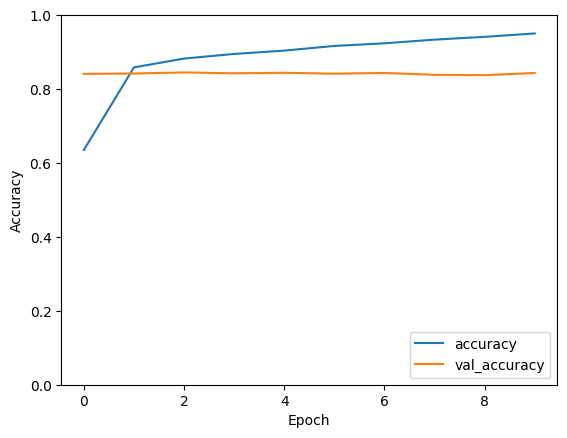

In [38]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.show()

In [39]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test_tfidf)

# The output is in probabilities for each class, to get the class with the highest probability
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# to get the original labels
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

63/63 [==============================] - 0s 2ms/step


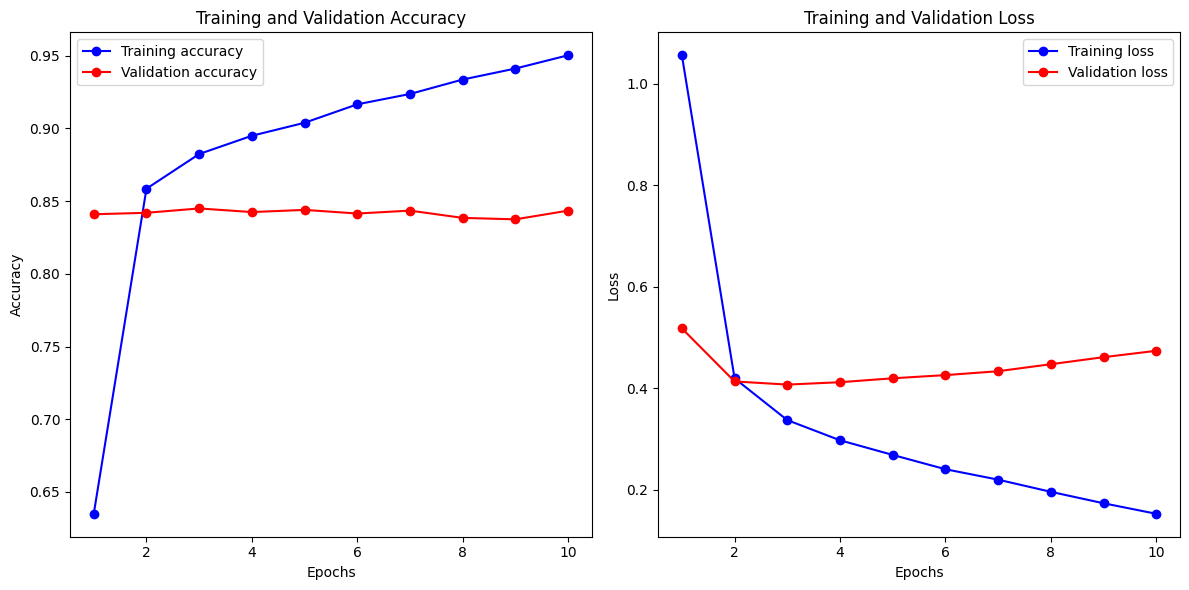

In [40]:
# Retrieve history of training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Retrieve history of training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Determine the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'bo-', label='Training loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Insight:

- Technical Insights:
 Training Performance: The training accuracy increases sharply initially and then continues to improve at a slower rate, reaching a high level. This indicates that the model is learning effectively from the training data.

 Validation Performance: The validation accuracy also improves rapidly at first and then levels off. It remains consistently lower than the training accuracy, which is common, but the gap does not widen significantly, suggesting that the model is generalizing well.

 Loss Behavior: The loss for both training and validation decreases as expected. The training loss continues to decrease, while the validation loss levels off. This is typical behavior as the model begins to fit the training data more closely.

63/63 [==============================] - 0s 2ms/step


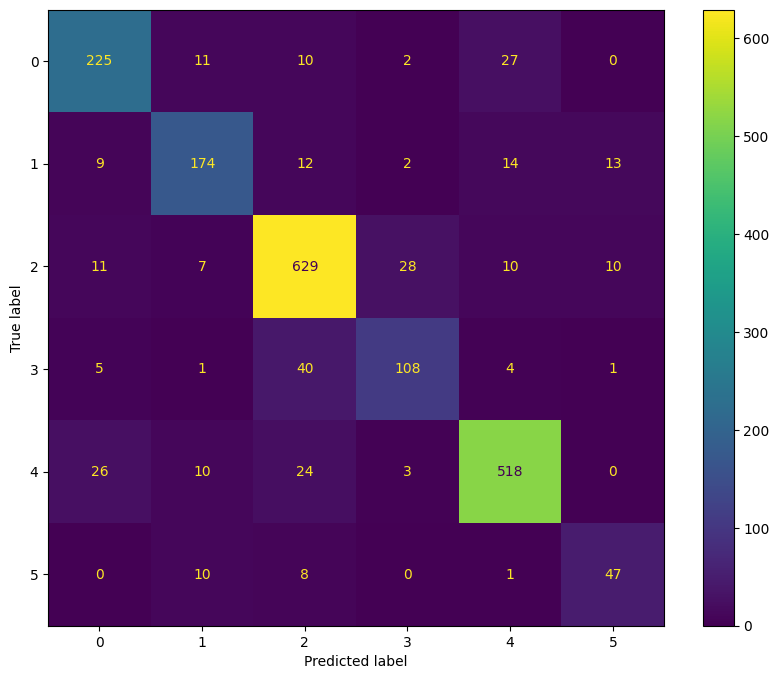

In [41]:
# Predict the values from the test dataset
y_test_pred = model.predict(X_test_tfidf)
# Convert predictions classes to one hot vectors
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
# Convert test observations to one hot vectors
y_test_true = np.argmax(y_test, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test_true, y_test_pred_classes)

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_mtx).plot(ax=ax)

In [42]:
true_labels_encoded = label_encoder.transform(ts_label)

# Generate a classification report
print(classification_report(true_labels_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Generate a confusion matrix
cm = confusion_matrix(true_labels_encoded, y_pred_classes)

              precision    recall  f1-score   support

       anger       0.82      0.82      0.82       275
        fear       0.82      0.78      0.80       224
         joy       0.87      0.91      0.89       695
        love       0.76      0.68      0.72       159
     sadness       0.90      0.89      0.90       581
    surprise       0.66      0.71      0.69        66

    accuracy                           0.85      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.85      0.85      0.85      2000



# VIII. Model Improvement

In [43]:
# Now, for hyperparameter tuning with Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_tfidf.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.05)))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='keras_tuner_demo')

tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


## Best Hyperparameter

In [44]:
# Start the hyperparameter search
tuner.search(X_tfidf, y_train,
             epochs=10,
             validation_data=(X_val_tfidf, y_val))

Trial 5 Complete [00h 00m 59s]
val_accuracy: 0.843833347161611

Best val_accuracy So Far: 0.8458333412806193
Total elapsed time: 00h 05m 05s


In [45]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 64 and the optimal learning rate for the optimizer
is 0.01.



In [46]:
# Build the model with the best hyperparameters and train it on the data for 50 epochs
model_tuned = tuner.hypermodel.build(best_hps)
history = model.fit(X_tfidf, y_train, epochs=50, validation_data=(X_val_tfidf, y_val))

Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 0.1338 - accuracy: 0.9577 - val_loss: 0.4907 - val_accuracy: 0.8340
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 0.1171 - accuracy: 0.9621 - val_loss: 0.4959 - val_accuracy: 0.8415
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0983 - accuracy: 0.9710 - val_loss: 0.5173 - val_accuracy: 0.8425
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0859 - accuracy: 0.9763 - val_loss: 0.5345 - val_accuracy: 0.8405
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0731 - accuracy: 0.9791 - val_loss: 0.5615 - val_accuracy: 0.8355
Epoch 6/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0639 - accuracy: 0.9831 - val_loss: 0.5677 - val_accuracy: 0.8415
Epoch 7/50
500/500 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9853 - val_loss: 0.5902 - val_accuracy: 0.8375
Epoch 

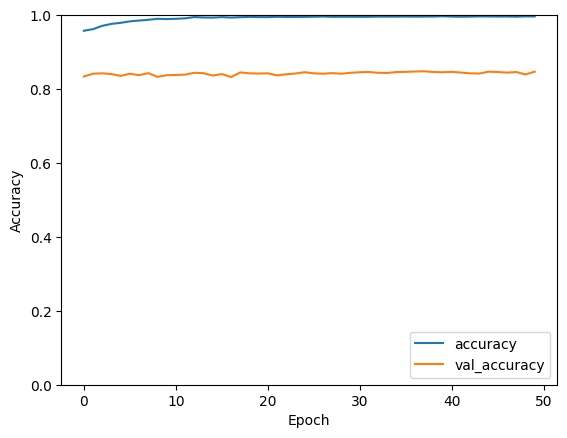

In [47]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.show()

### Insights
turns out that this improvment using hyperparamater tuning led to a ovefit model, so let's stick to default model. Eventhuogh val_score accuray reach 0.84 but still this model won't fit in real world scenario


# IX. Model Saving

In [48]:
# Save the model
model.save('my_trained_model.h5')

# Example for TensorFlow Serving
model.save('my_model_serving', save_format='tf')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
# Save the TF-IDF vectorizer to a file
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# X. Model Inference

In [64]:
def predict_tfidf(text, model_path, tfidf_vectorizer_path):
    import pickle
    from tensorflow.keras.models import load_model
    import matplotlib.pyplot as plt
    import numpy as np
    import re
    from sklearn.preprocessing import LabelEncoder

    # Placeholder for text preprocessing (cleaning, lemmatization, and removal of stopwords)
    def preprocess_text(text):
        # Lowercasing and removing punctuation and numbers
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        # Placeholder for lemmatization and removal of stopwords
        # Assuming these steps are done here
        return text

    # Load the trained model
    model = load_model('/content/my_trained_model.h5')

    # Load the fitted TF-IDF vectorizer
    with open('/content/tfidf_vectorizer.pkl', 'rb') as f:
        tfidf_vectorizer = pickle.load(f)

    # Preprocess the input text
    preprocessed_text = preprocess_text(text)

    # Vectorize the preprocessed text
    x_new_tfidf = tfidf_vectorizer.transform([preprocessed_text])

    # Predict the probabilities
    predictions = model.predict(x_new_tfidf.toarray())

    # Assuming a multi-class classification with one-hot encoded labels
    emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness', 4: 'surprise', 5: 'love'}  # Update as per your actual classes

    # Visualization
    labels = list(emotions.values())
    probs = predictions[0]
    plt.figure(figsize=(10, 8))
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.show()


1/1 [==============================] - 0s 72ms/step


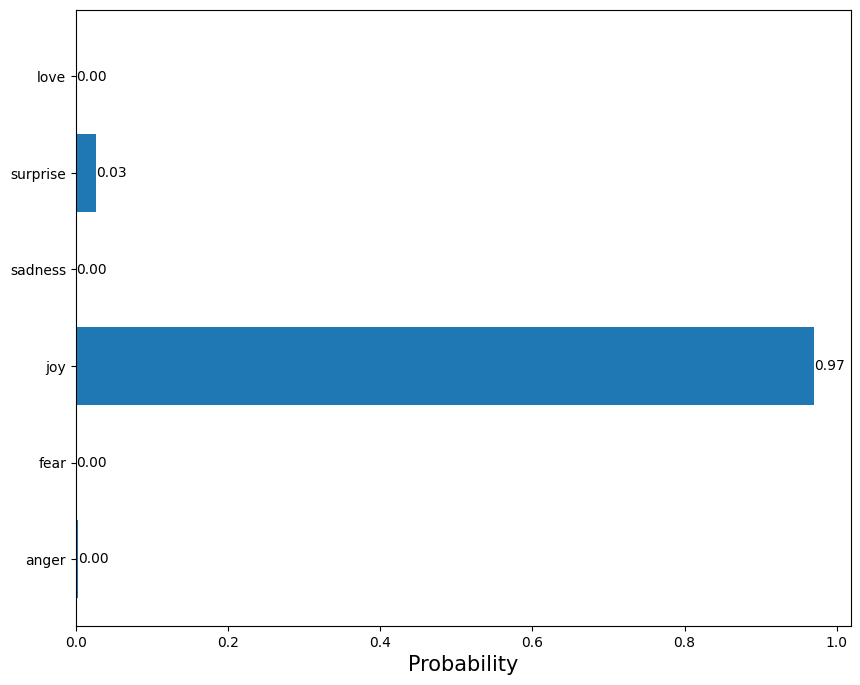

In [66]:
txt = 'I am very happy to finish this project'
predict_tfidf(txt, '/content/my_trained_model.h5', '/content/tfidf_vectorizer.pkl')